In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

DATASETS_DIR = "./Datasets/Moneys/"

classnames = []

for path in Path(DATASETS_DIR).iterdir():
    if path.is_dir():
        classnames.append(str(path).split("\\")[-1])

print(classnames)

['10000', '20000', '50000']


In [2]:
X = []
y = []

for i in range(len(classnames)):
    print(classnames[i])
    images = list(Path(DATASETS_DIR + classnames[i]).glob("*"))
    for image in range(int(0.4 * len(images))):
        img = cv2.imread(str(images[image]))
        img = cv2.resize(img, (128, 128))
        img = img.astype("float32")
        img = img / 255
        X.append(img)
        y.append(i)

10000
20000
50000


In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 128, 128, 3)
(240, 128, 128, 3)
(960, 3)
(240, 3)


[0. 0. 1.]


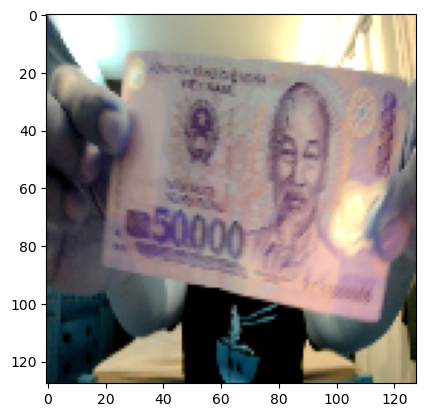

In [4]:
plt.imshow(X_train[2])
print(y_train[2])

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="Same",
                 activation="relu", input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

history = model.fit(X_train, y_train, epochs=30, batch_size=128, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [6]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 4s 253ms/step - loss: 7.3991e-05 - accuracy: 1.0000


[7.399064634228125e-05, 1.0]

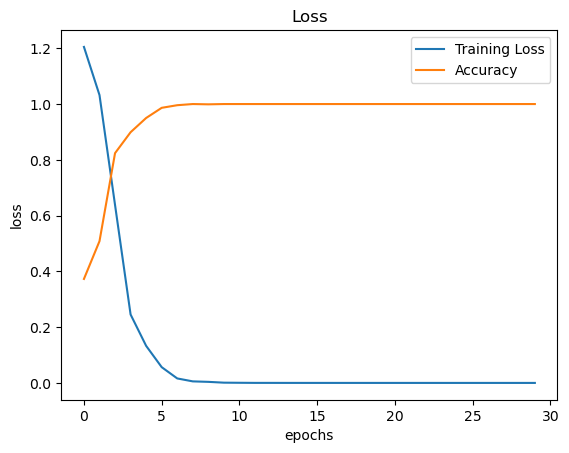

In [7]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

(128, 128, 3)
1/1 [==============================] - 0s 215ms/step
Predict: 50000
True Label: 50000


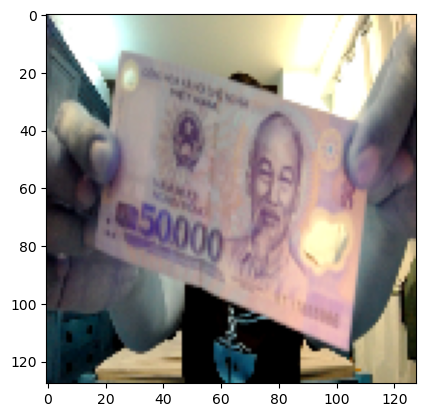

In [8]:
n = 0
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 49ms/step
Predict: 10000
True Label: 10000


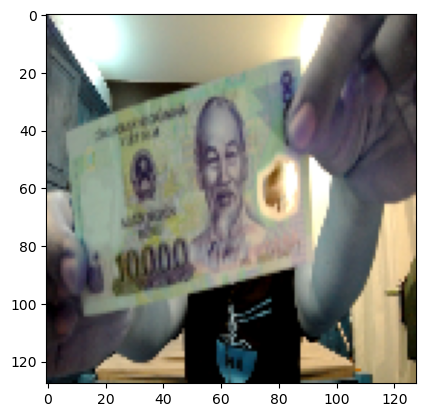

In [9]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 56ms/step
Predict: 10000
True Label: 10000


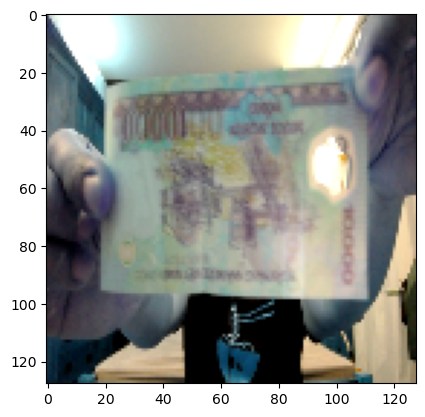

In [10]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 43ms/step
Predict: 10000
True Label: 10000


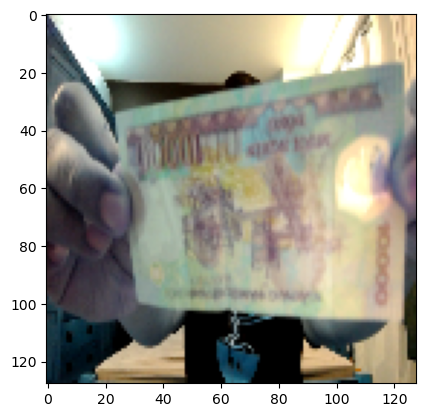

In [11]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 62ms/step
Predict: 10000
True Label: 10000


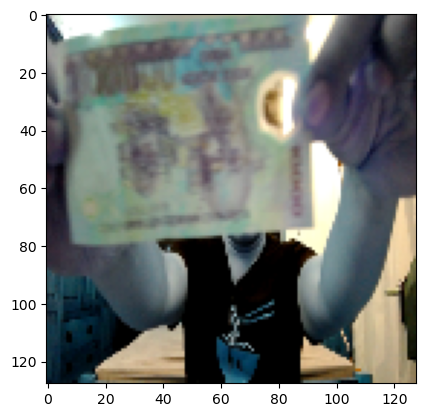

In [12]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 51ms/step
Predict: 10000
True Label: 10000


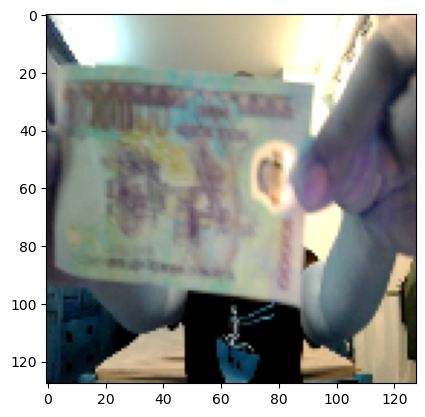

In [13]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 59ms/step
Predict: 50000
True Label: 50000


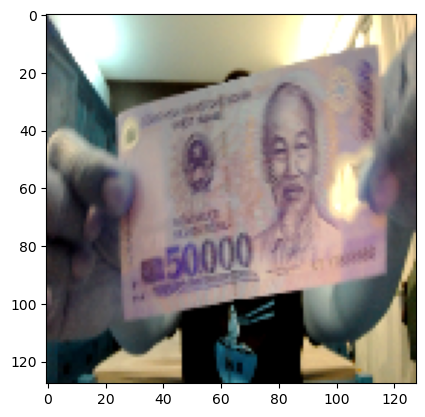

In [14]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 62ms/step
Predict: 10000
True Label: 10000


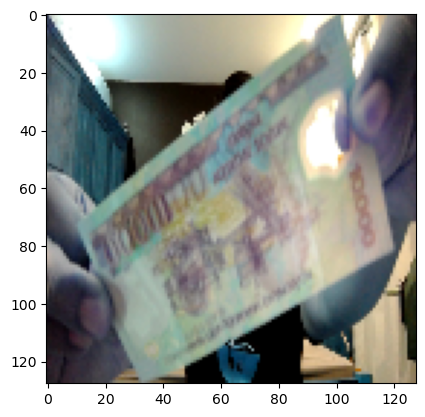

In [15]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 45ms/step
Predict: 20000
True Label: 20000


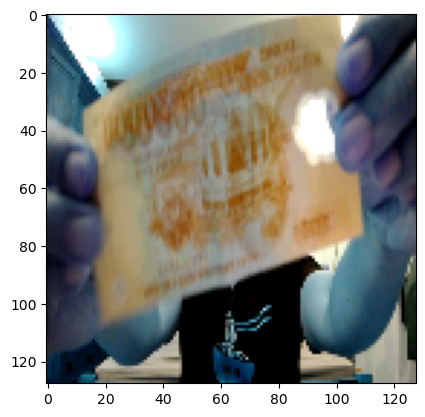

In [16]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 39ms/step
Predict: 10000
True Label: 10000


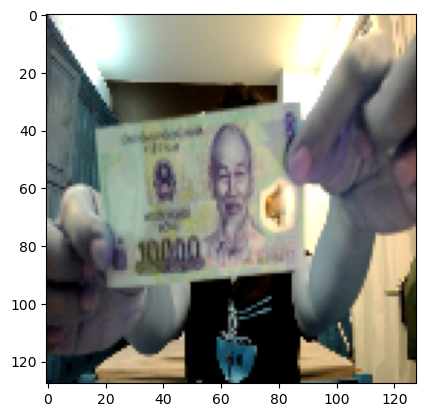

In [17]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])